In [2]:
import requests
import lxml.html as lh
import pandas as pd
from bs4 import BeautifulSoup

In [106]:
data = []
count = 1
for year in range(1980,2020):
    website_url = requests.get('https://www.basketball-reference.com/leagues/NBA_'+str(year)+'_per_game.html')
    soup = BeautifulSoup(website_url.content,'lxml')
    soup.prettify()
    My_table = soup.find('table',{'id':"per_game_stats"})
    tabledata = My_table.findAll('td')
    for cell in tabledata:
        data.append(cell.get_text())

In [107]:
import numpy as np
data2 = np.array(data)
refined = np.reshape(data2, (-1, 29))

In [108]:
tableheader = My_table.findAll('th')
headers = []
count = 0
for item in tableheader:
    if (count < 30):
        headers.append(item.get_text())
        count=count+1
headers.remove('Rk')
print(headers)

['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']


In [109]:
import pandas as pd
df1 = pd.DataFrame(refined, columns=headers)
df1.head()
len(df1)

20299

In [110]:
df1 = df1.drop_duplicates(subset='Player', keep='first')
df1.head()
len(df1)

3059

In [18]:
df2=df1[(round(len(df1)*.5 - 1)):]
df2 = df2.dropna()
df2.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
8503,Kelly McCarty,SG,23,DEN,2,0,2.0,1.0,1.5,.667,...,,1.0,0.5,1.5,0.0,0.0,0.0,1.0,0.0,2.0
8506,Jelani McCoy,C,21,SEA,26,0,12.7,2.2,2.9,.737,...,.500,1.0,2.0,3.0,0.2,0.4,0.8,0.4,1.6,5.1
8513,Roshown McLeod,SF,23,ATL,34,0,10.2,1.8,4.8,.380,...,.822,0.4,1.1,1.5,0.4,0.1,0.0,0.7,0.7,4.8
8518,Brad Miller,C,22,CHH,38,0,12.3,2.1,3.6,.565,...,.794,0.9,2.2,3.1,0.6,0.2,0.5,0.8,1.7,6.3
8525,Cuttino Mobley,PG,23,HOU,49,37,29.7,3.5,8.3,.425,...,.818,0.4,1.8,2.3,2.5,0.9,0.5,1.6,2.0,9.9


In [22]:
players = df2['Player'].values
print(len(players))

1531


In [24]:
df2 = df2.drop(['Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P','3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB','DRB', 'TOV', 'PF'], axis=1)
df2.head()

,Player,TRB,AST,STL,BLK,PTS
8503,Kelly McCarty,1.5,0.0,0.0,0.0,2.0
8506,Jelani McCoy,3.0,0.2,0.4,0.8,5.1
8513,Roshown McLeod,1.5,0.4,0.1,0.0,4.8
8518,Brad Miller,3.1,0.6,0.2,0.5,6.3
8525,Cuttino Mobley,2.3,2.5,0.9,0.5,9.9


In [81]:
df2['NBATRB'] = df2['TRB']
df2['NBAAST'] = df2['AST']
df2['NBASTL'] = df2['STL']
df2['NBABLK'] = df2['BLK']
df2['NBAPTS'] = df2['PTS']
df2 = df2.drop(['TRB', 'AST', 'STL', 'BLK', 'PTS'], axis=1)
df2.head()

,Player,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
8503,Kelly McCarty,1.5,0.0,0.0,0.0,2.0
8506,Jelani McCoy,3.0,0.2,0.4,0.8,5.1
8513,Roshown McLeod,1.5,0.4,0.1,0.0,4.8
8518,Brad Miller,3.1,0.6,0.2,0.5,6.3
8525,Cuttino Mobley,2.3,2.5,0.9,0.5,9.9


In [63]:
maindata = []
for name in players:
    realname = name
    name = name.lower()
    name = name.replace(" ", "-")
    website_url = requests.get('https://www.sports-reference.com/cbb/players/'+ name +'-1.html')
    soup = BeautifulSoup(website_url.content,'lxml')
    soup.prettify()
    My_table = soup.find('table',{'id':'players_per_game'})
    if My_table is not None:
        maindata = maindata + [realname]
        tabledata = My_table.findAll('td')
        data = []
        for cell in tabledata:
            data.append(cell.get_text())
        maindata = maindata +data[-28:]

In [69]:
import numpy as np
maindata2 = np.array(maindata)
refined = np.reshape(maindata2, (-1, 29))

In [70]:
tableheader = My_table.findAll('th')
headers = []
count = 0
for item in tableheader:
    if (count < 29):
        headers.append(item.get_text())
        count=count+1
headers.remove('Season')
headers = ['Name'] + headers
print(headers)

['Name', 'School', 'Conf', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '2P', '2PA', '2P%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', '\xa0', 'SOS']


In [71]:
import pandas as pd
df1 = pd.DataFrame(refined, columns=headers)
df1.head()

,Name,School,Conf,G,GS,MP,FG,FGA,FG%,2P,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,,SOS
0,Kelly McCarty,Southern Miss,,117,,30.5,4.5,10.6,.421,3.6,...,,7.3,1.3,1.2,1.1,,,11.9,,3.73
1,Jelani McCoy,UCLA,,78,,28.0,4.4,6.4,.694,4.4,...,,7.1,1.1,0.6,2.4,2.3,2.1,10.4,,9.55
2,Roshown McLeod,Duke,,69,,24.2,4.9,10.0,.492,3.9,...,,5.4,1.1,1.0,0.9,1.7,1.5,13.6,,
3,Brad Miller,Purdue,,128,81,24.8,3.8,6.7,.572,3.8,...,,6.7,2.0,1.1,1.3,2.2,2.7,12.0,,8.59
4,Cuttino Mobley,Rhode Island,,93,,27.6,5.0,11.5,.438,3.4,...,,4.2,2.0,1.5,0.4,1.9,1.9,14.3,,5.73


In [76]:
df1.to_csv('CollegeStatLog.csv')

In [ ]:
# maybe add year later
#Also maybe add position

In [ ]:
df3 = df1.merge(df2, left_on='Name', right_on='Player')
df3 = df3.drop(['Player', 'Conf', '\xa0'], axis=1)
df3 = df3.set_index('Name')
df3.tail()

In [95]:
df3.to_csv('CollegeRookieStatLog.csv')

In [96]:
df3 = df3.drop(['School'], axis=1)

In [98]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
cols = df3.columns
sc2 = StandardScaler()
for col in cols:
    df3[col] = pd.to_numeric(df3[col], errors='coerce')
    df3[[col]] = sc2.fit_transform(df3[[col]])

In [101]:
df3 = df3.dropna()

In [113]:
df3.to_csv('Clean+NormCollegeRookieStatLog.csv')

## Correlation Matrix

AxesSubplot(0.127273,0.125;0.617727x0.755)


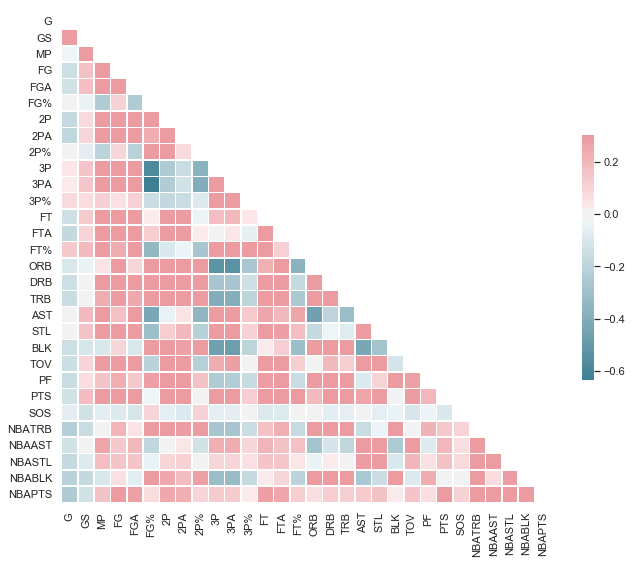

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

d = df3

corr = d.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

print(sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}))

In [117]:
df3.head()

,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,...,BLK,TOV,PF,PTS,SOS,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,,,,,,,,,,,,,,,,,
Eddie Robinson,0.621985,0.224598,0.622192,-0.607978,-1.306557,-0.303833,-1.331764,-1.161882,-0.076171,-0.770791,...,-0.744495,1.181910,-1.401899,-1.729337,-3.392886,0.246263,-0.458888,0.703671,0.429447,0.601148
Gilbert Arenas,-0.569514,-0.999416,0.348040,0.224071,0.820518,-0.078192,0.403539,0.484219,-0.036218,0.731761,...,-0.744495,0.910970,0.440162,0.805144,1.261145,0.304414,2.174848,2.876663,-0.188418,1.644031
Brandon Armstrong,-0.704912,-1.086845,0.334985,0.443032,1.706799,-0.138512,0.603767,1.126600,-0.054863,1.608250,...,-0.744495,-0.172788,0.808574,1.355079,-0.914799,-1.033055,-0.705800,-0.654450,-0.806283,-0.789364
Carlos Arroyo,0.242872,-1.115988,0.961617,0.224071,0.968231,-0.125108,0.270054,0.323624,-0.038549,0.982186,...,-0.875456,2.265669,-2.138723,0.852964,-2.042126,-0.684150,0.693372,-0.382826,-0.806283,-0.468476
Shane Battier,1.488530,-0.824556,0.465534,-0.016785,-0.124849,-0.002234,-0.464112,-0.720245,-0.020570,0.982186,...,1.219916,-1.121077,-1.033486,0.279119,0.994547,1.816336,1.434110,3.148288,2.283043,2.579952


In [118]:
#maybe combine with dummified college name too?

In [126]:
train=df3[0:(round(len(df3)*.8))] 
test=df3[(round(len(df3)*.8)):]
trains = np.split(train, [25], axis=1)
train_y=trains[1]
train_x=trains[0]
tests = np.split(test, [25], axis=1)
test_y=tests[1]
test_x=tests[0]

In [127]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

In [129]:
test_y.head()

,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,
Brandon Ingram,1.002224,0.857980,0.432046,0.738380,1.242922
Demetrius Jackson,-0.858603,-0.376583,-1.197698,-0.806283,-0.735883
Pierre Jackson,-0.684150,1.104893,-0.382826,-0.806283,-0.094108
Damian Jones,0.013660,-0.870409,-0.926074,0.429447,-0.762623
Skal Labissiere,1.525581,-0.211975,0.160422,0.429447,1.082478


## Lin Reg

In [130]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_x.values, train_y.NBAPTS.values)
#reg.score(train_x.values, train_y.PredAst.values)

reg.coef_

array([-2.15329662e-01,  2.35487843e-02, -5.21660465e-01, -1.13124414e-01,
       -3.71054519e+00,  8.22370142e-02,  2.67291348e-01,  2.00507395e+00,
       -6.45554305e+00, -2.92895854e-01,  2.13529571e+00, -5.39823866e-02,
        4.18825622e-02, -2.52074082e-01, -1.11559952e-01, -2.75138365e-03,
        3.29188532e-02,  2.25941175e-02,  2.90386196e-01,  1.26394206e-01,
        8.92537352e-02, -1.63725218e-01,  1.88311634e-03,  1.38960759e+00,
        1.08359248e-01])

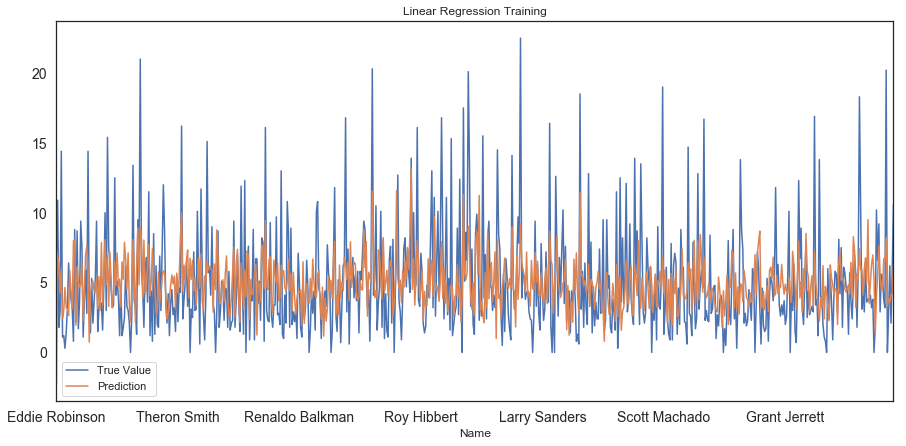

adj train r^2 = 0.18672023213934996
train mse = 11.316098525322557


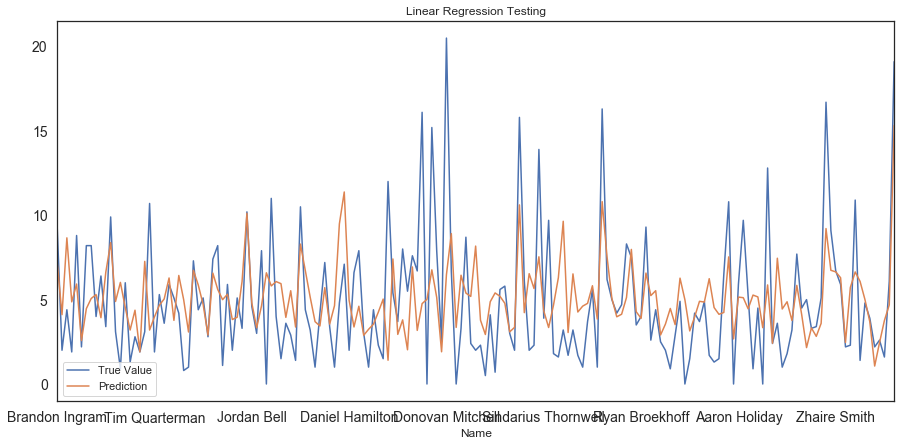

['G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '2P', '2PA', '2P%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'SOS']
adj test r^2 = 0.21420468956015049
test mse = 11.19250823218555


In [132]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))